In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

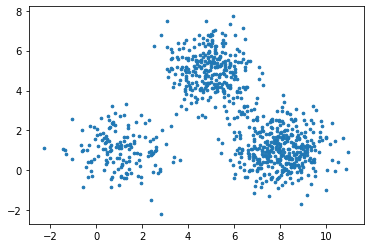

In [8]:
centroid_1 = np.array([1, 1])
centroid_2 = np.array([5,5])
centroid_3 = np.array([8,1])

# random data and center it to the three centroids
data_1 = np.random.randn(150, 2) + centroid_1
data_2 = np.random.randn(300,2) + centroid_2
data_3 = np.random.randn(400,2) + centroid_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7);

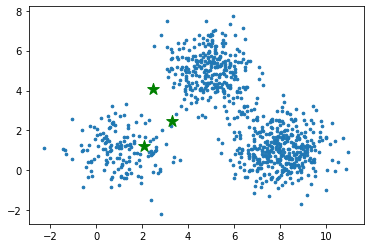

In [13]:
# K means
k = 3 #centroids
n = data.shape[0] #training data
c = data.shape[1] #features in the data

# Generate random centroids
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centroids = np.random.randn(k, c)*std + mean

plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150);

In [15]:
centroids_old = np.zeros(centroids.shape) # to store old centroids
centroids_new = deepcopy(centroids) # Store new centroids

data.shape
clusters = np.zeros(n)
distances = np.zeros((n, k))

error = np.linalg.norm(centroids_new - centroids_old)

# after an update, the estimate of that centroid stays the same
while error != 0:
    for i in range(k):
        
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
    clusters = np.argmin(distances, axis=1)
        
    centroids_old = deepcopy(centroids_new)
    for i in range(k):
        centroids_new[i] = np.mean(data[clusters == i], axis = 0)
    error = np.linalg.norm(centroids_new - centroids_old)
centroids_new    

array([[4.71992384, 5.43577833],
       [7.49816608, 1.56215664],
       [0.9840972 , 0.92206286]])

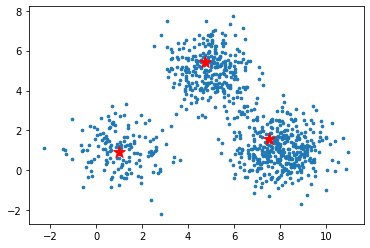

In [18]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='r', s=150);

In [19]:
data = pd.read_csv(r'C:/Users/utilisateur/Desktop/x/dataset_1.csv')
df = data.copy()

In [20]:
df.drop('Unnamed: 0', axis=1)

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561
...,...,...
995,-5.060165,2.482045
996,-5.079404,2.773580
997,-5.861520,3.068426
998,-5.018934,3.110904


In [22]:
x = df.iloc[:, [1, 2]].values
x

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       ...,
       [-5.86152028,  3.06842556],
       [-5.01893361,  3.11090369],
       [-6.79933099,  2.08232074]])

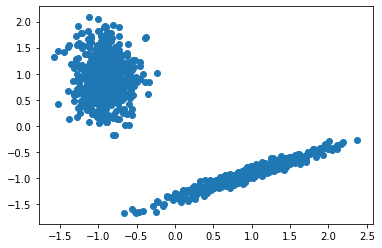

In [25]:
x = StandardScaler().fit_transform(x)
plt.scatter(x[:,0], x[:, 1]);

In [29]:
k = 2 #centroids
n = x.shape[0] #training data
c = x.shape[1] #features in the data

# Generate random centroids
mean = np.mean(x, axis = 0)
std = np.std(x, axis = 0)
centroids = np.random.randn(k, c)*std + mean

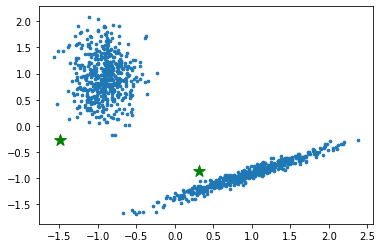

In [30]:
plt.scatter(x[:,0], x[:,1], s=7)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150);

In [31]:
centroids_old = np.zeros(centroids.shape) 
centroids_new = deepcopy(centroids) 

x.shape
clusters = np.zeros(n)
distances = np.zeros((n, k))

error = np.linalg.norm(centroids_new - centroids_old)

while error != 0:
    for i in range(k):
        distances[:, i] = np.linalg.norm(x - centroids[i], axis=1)
    clusters = np.argmin(distances, axis=1)
        
    centroids_old = deepcopy(centroids_new)
    for i in range(k):
        centroids_new[i] = np.mean(x[clusters == i], axis = 0)
    error = np.linalg.norm(centroids_new - centroids_old)
centroids_new  

array([[ 0.91670593, -0.93735114],
       [-0.91670593,  0.93735114]])

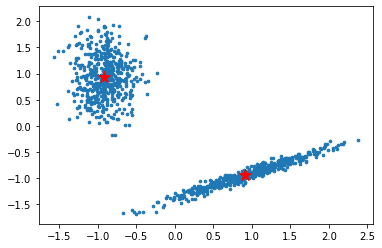

In [32]:
plt.scatter(x[:,0], x[:,1], s=7)
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='r', s=150);